<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-05 14:43:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.8MB/s    in 2.2s    

2025-04-05 14:43:10 (68.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



In [4]:
df_db = df[['ResponseId','DatabaseWantToWorkWith']]

In [5]:
#split Database variable 
# step 1 : Split the multiples choices of DatabaseWantToWorkWith into listes
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')

# step 2 : Explode the list to obtain on row by type of db
df_db_exploded = df_db.explode('DatabaseWantToWorkWith')
df_db_exploded['DatabaseWantToWorkWith'].head()

/tmp/ipykernel_8406/3700232379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')


0                           NaN
1                    PostgreSQL
2    Firebase Realtime Database
3                       MongoDB
3                         MySQL
Name: DatabaseWantToWorkWith, dtype: object

In [6]:
#top 5 databases
database_counts = df_db_exploded['DatabaseWantToWorkWith'].value_counts()
top5_database = database_counts.head(5)
print(top5_database)

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


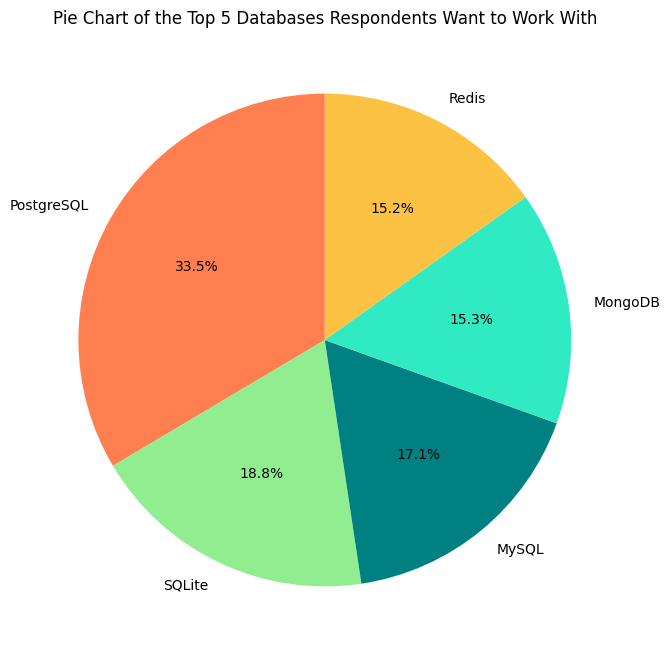

In [7]:
# plot the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(top5_database, labels=top5_database.index, autopct='%1.1f%%', startangle=90, 
        colors=['coral', 'lightgreen', 'teal', '#2feac2',  '#fcc243'])

plt.title('Pie Chart of the Top 5 Databases Respondents Want to Work With')
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



In [8]:
#select variables
df_dev=df[['DevType','ResponseId']]

In [9]:
#check for DevType unique entry
df_dev['DevType'].unique()

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [10]:
#top 5 of DevType
devtype_counts = df_dev['DevType'].value_counts()
top5_dev = devtype_counts.head(5)
print(top5_dev)

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Name: count, dtype: int64


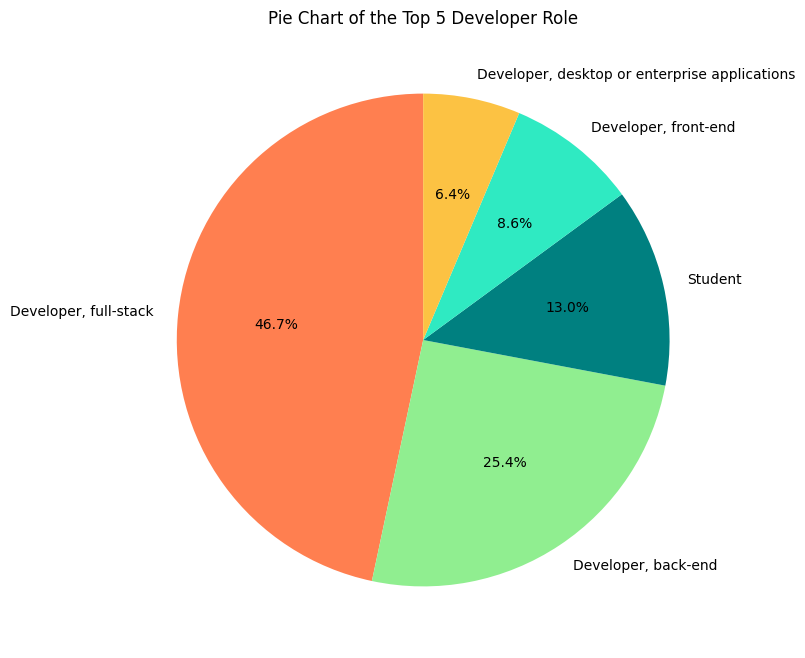

In [12]:
# plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_dev, labels=top5_dev.index, autopct='%1.1f%%', startangle=90, 
        colors=['coral', 'lightgreen', 'teal', '#2feac2', '#fcc243'])

plt.title('Pie Chart of the Top 5 Developer Role')
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. 
Let’s visualize the distribution of the top operating systems in a pie chart.

➡️*OpSysProfessional does not exist. Check for the correct name of variable*

In [13]:
# Retrieve the variable with a name like OpSys
columns_containing = df.filter(like='OpSys').columns
print(columns_containing)

Index(['OpSysPersonal use', 'OpSysProfessional use'], dtype='object')


In [14]:
#select variables of interest
df_ops =df[['OpSysProfessional use','ResponseId']]

In [15]:
#check for unique entry of variable 'OpSysProfessional use'
df_ops['OpSysProfessional use'].unique()

array([nan, 'MacOS', 'Windows', ..., 'ChromeOS;iOS;MacOS;Red Hat;Windows',
       'Android;MacOS;Windows Subsystem for Linux (WSL)',
       'BSD;Cygwin;Debian;Fedora;iOS;MacOS;Other Linux-based;Red Hat;Windows;Windows Subsystem for Linux (WSL)'],
      shape=(2033,), dtype=object)

In [16]:
#remove missing value
df_ops.dropna(subset='OpSysProfessional use', inplace=True)
(df_ops.isnull().sum())

/tmp/ipykernel_8406/1088282154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops.dropna(subset='OpSysProfessional use', inplace=True)


OpSysProfessional use    0
ResponseId               0
dtype: int64

In [17]:
#split and explode OpSysProfessional use to obtain distinct OpSystem
df_ops['OpSysProfessional use'] = df_ops['OpSysProfessional use'].str.split(';')
df_ops_exploded = df_ops.explode('OpSysProfessional use')
df_ops_exploded['OpSysProfessional use'].head()

/tmp/ipykernel_8406/3490821497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['OpSysProfessional use'] = df_ops['OpSysProfessional use'].str.split(';')


1      MacOS
2    Windows
6      MacOS
7      MacOS
8      MacOS
Name: OpSysProfessional use, dtype: object

In [18]:
#count unique / distinct OpSys
unique_count = df_ops_exploded['OpSysProfessional use'].nunique()
print(unique_count)

19


In [19]:
#top 10 OpSys
opsys_counts = df_ops_exploded['OpSysProfessional use'].value_counts()
top10_opsys = opsys_counts.head(10)

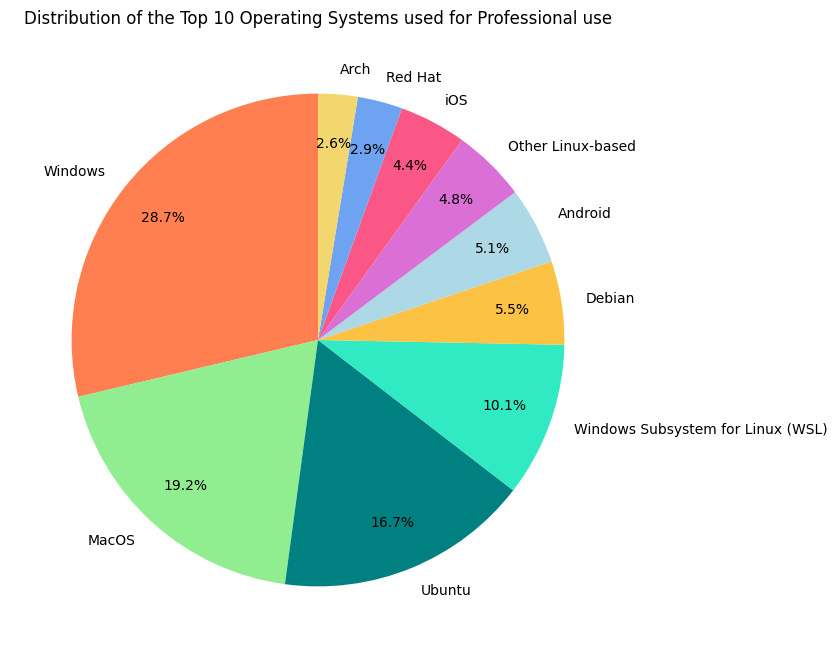

In [20]:
# Plot the pie chart
plt.figure(figsize=(8, 8))  
plt.pie(top10_opsys, labels=top10_opsys.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['coral', 'lightgreen', 'teal', '#2feac2', '#fcc243','lightblue','orchid',
              '#fb5786','#6da3f1','#f1d76d'])

plt.title('Distribution of the Top 10 Operating Systems used for Professional use')
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



In [21]:
#select variables of interest
df_lang = df[['LanguageHaveWorkedWith','ResponseId']]

In [22]:
#check for unique values of variable
df_lang['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'],
      shape=(23865,), dtype=object)

In [23]:
#split and explode language
df_lang['LanguageHaveWorkedWith']=df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded=df_lang.explode('LanguageHaveWorkedWith')
df_lang_exploded['LanguageHaveWorkedWith'].head()

/tmp/ipykernel_8406/3131108588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageHaveWorkedWith']=df_lang['LanguageHaveWorkedWith'].str.split(';')


0                        NaN
1    Bash/Shell (all shells)
1                         Go
1                   HTML/CSS
1                       Java
Name: LanguageHaveWorkedWith, dtype: object

In [24]:
#remove NaN
df_lang_exploded.dropna(subset='LanguageHaveWorkedWith',inplace=True)

In [25]:
#check for NaN removal
(df_lang_exploded.isnull().sum())

LanguageHaveWorkedWith    0
ResponseId                0
dtype: int64

In [26]:
#top 5 of language
lang_counts=df_lang_exploded['LanguageHaveWorkedWith'].value_counts() 
top5_lang = lang_counts.head(5) 
top5_lang

LanguageHaveWorkedWith
JavaScript    37492
HTML/CSS      31816
Python        30719
SQL           30682
TypeScript    23150
Name: count, dtype: int64

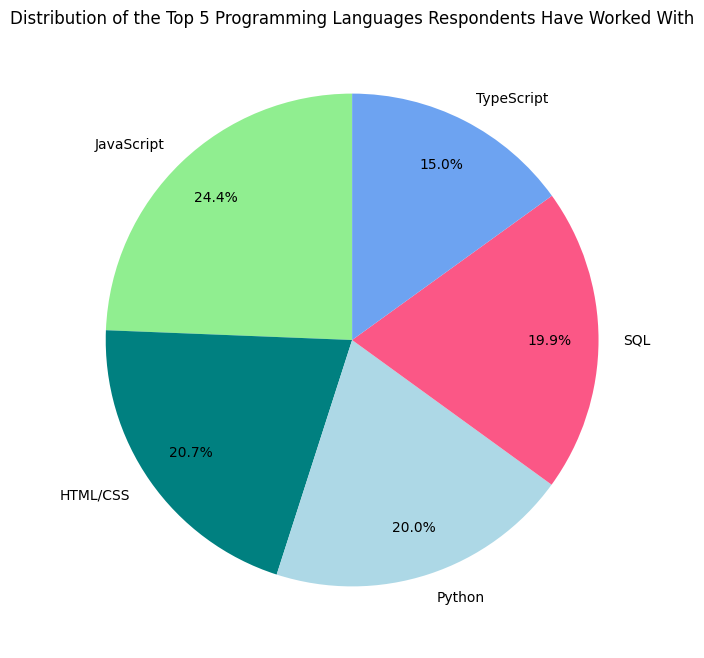

In [27]:
# plot the pie chart
plt.figure(figsize=(8, 8))  
plt.pie(top5_lang, labels=top5_lang.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['lightgreen', 'teal', 'lightblue','#fb5786','#6da3f1'])

plt.title('Distribution of the Top 5 Programming Languages Respondents Have Worked With')
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



In [28]:
#select the variables of interest
df_tools = df[['NEWCollabToolsHaveWorkedWith','ResponseId']] 

In [29]:
#check for unique value in Tools
df_tools['NEWCollabToolsHaveWorkedWith'].unique()

array([nan, 'PyCharm;Visual Studio Code;WebStorm', 'Visual Studio', ...,
       'Android Studio;IntelliJ IDEA;Jupyter Notebook/JupyterLab;Neovim;PyCharm;Visual Studio Code',
       'PhpStorm;RubyMine;Vim;Visual Studio Code;WebStorm',
       'DataGrip;IntelliJ IDEA;PyCharm;Rider;Sublime Text;Vim;Visual Studio;Visual Studio Code;WebStorm;Xcode'],
      shape=(14169,), dtype=object)

In [30]:
#split tools 
df_tools['NEWCollabToolsHaveWorkedWith']=df['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools_exploded=df_tools.explode('NEWCollabToolsHaveWorkedWith') 
df_tools_exploded['NEWCollabToolsHaveWorkedWith'].head()

/tmp/ipykernel_8406/3509216489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tools['NEWCollabToolsHaveWorkedWith']=df['NEWCollabToolsHaveWorkedWith'].str.split(';')


0                   NaN
1               PyCharm
1    Visual Studio Code
1              WebStorm
2         Visual Studio
Name: NEWCollabToolsHaveWorkedWith, dtype: object

In [31]:
#remove NaN
df_tools_exploded.dropna(subset='NEWCollabToolsHaveWorkedWith',inplace =True)

In [32]:
#chekc for NaN removal
(df_tools_exploded.isnull().sum())

NEWCollabToolsHaveWorkedWith    0
ResponseId                      0
dtype: int64

In [33]:
#top 10 of tools
tools_counts = df_tools_exploded['NEWCollabToolsHaveWorkedWith'].value_counts() 
top10_tools=tools_counts.head(10)

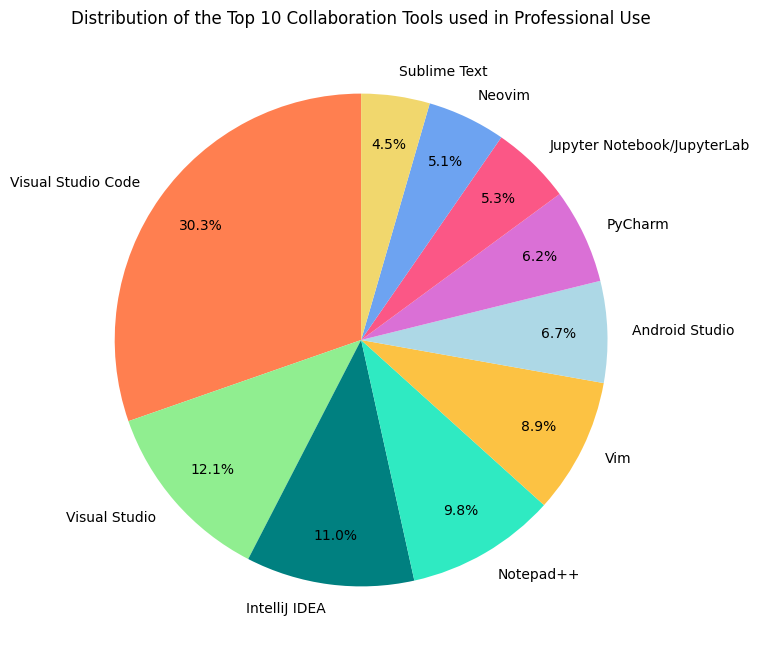

In [34]:
# plot the pie chart
plt.figure(figsize=(8, 8))  
plt.pie(top10_tools, labels=top10_tools.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['coral', 'lightgreen', 'teal', '#2feac2', '#fcc243','lightblue','orchid',
              '#fb5786','#6da3f1','#f1d76d'])

plt.title('Distribution of the Top 10 Collaboration Tools used in Professional Use')
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



In [35]:
#select variables of interest
df_admired_lang = df[['LanguageAdmired','ResponseId']]

In [36]:
#check for unique Language
df_admired_lang['LanguageAdmired'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ..., 'Elixir;Lua;Python;Ruby;SQL',
       'Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;PowerShell;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net)',
       'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Objective-C;Python;SQL;Swift;TypeScript'],
      shape=(12336,), dtype=object)

In [37]:
#split languages
df_admired_lang['LanguageAdmired']=df_admired_lang['LanguageAdmired'].str.split(';') 
df_admired_exploded = df_admired_lang.explode('LanguageAdmired') 
df_admired_exploded['LanguageAdmired'].head()

/tmp/ipykernel_8406/2042211881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_admired_lang['LanguageAdmired']=df_admired_lang['LanguageAdmired'].str.split(';')


0                        NaN
1    Bash/Shell (all shells)
1                         Go
1                   HTML/CSS
1                       Java
Name: LanguageAdmired, dtype: object

In [38]:
#remove NaN
df_admired_exploded.dropna(subset='LanguageAdmired',inplace=True)

In [39]:
#check for NaN removal
(df_admired_exploded.isnull().sum())

LanguageAdmired    0
ResponseId         0
dtype: int64

In [40]:
#top 10 of languages admired
admired_lang_counts = df_admired_exploded['LanguageAdmired'].value_counts() 
top5_admired_lang = admired_lang_counts.head(5) 
top5_admired_lang

LanguageAdmired
JavaScript    21869
Python        20774
SQL           20692
HTML/CSS      19851
TypeScript    16079
Name: count, dtype: int64

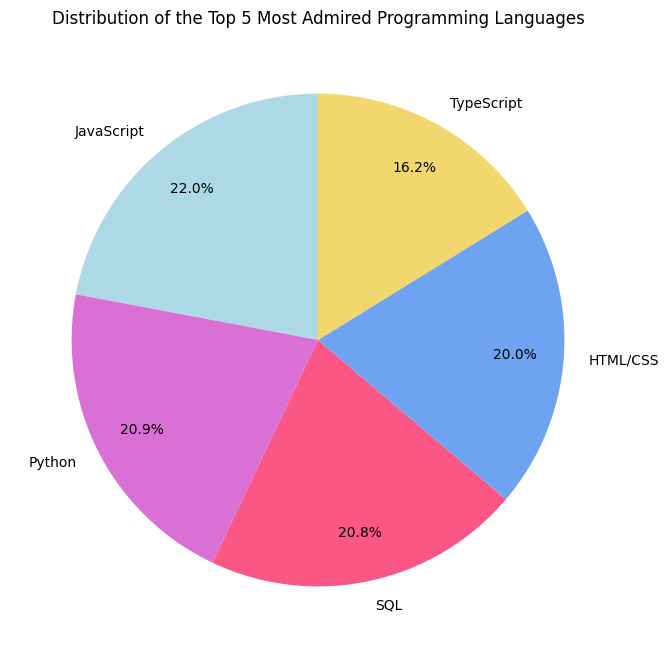

In [41]:
# plot the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(top5_admired_lang, labels=top5_admired_lang.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['lightblue','orchid',
              '#fb5786','#6da3f1','#f1d76d'])

plt.title('Distribution of the Top 5 Most Admired Programming Languages')
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



➡️*No AIToolCurrently variable. Retrieve the exact variable name.*

In [42]:
#check for the variable like AIToolCurrently
columns_containing = df.filter(like='AITool').columns
print(columns_containing)

Index(['AIToolCurrently Using', 'AIToolInterested in Using',
       'AIToolNot interested in Using'],
      dtype='object')


In [43]:
#select the variables of interest
df_AI = df[['AIToolCurrently Using','ResponseId']]

In [44]:
#check for unique entry in AIToolCurrently Using
df_AI['AIToolCurrently Using'].unique()

array([nan,
       'Learning about a codebase;Project planning;Writing code;Documenting code;Debugging and getting help;Deployment and monitoring;Search for answers;Generating content or synthetic data',
       'Writing code;Debugging and getting help', ...,
       'Learning about a codebase;Project planning;Writing code;Debugging and getting help;Testing code;Committing and reviewing code;Deployment and monitoring;Predictive analytics;Search for answers;Generating content or synthetic data;Other (please specify):',
       'Learning about a codebase;Project planning;Writing code;Testing code;Committing and reviewing code;Search for answers;Generating content or synthetic data;Other (please specify):',
       'Learning about a codebase;Writing code;Committing and reviewing code;Deployment and monitoring;Predictive analytics;Search for answers'],
      shape=(1311,), dtype=object)

In [45]:
#split AI Tool
df_AI['AIToolCurrently Using']=df_AI['AIToolCurrently Using'].str.split(';') 
df_AI_exploded = df_AI.explode('AIToolCurrently Using') 
df_AI_exploded['AIToolCurrently Using'].head()

/tmp/ipykernel_8406/4138054206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AI['AIToolCurrently Using']=df_AI['AIToolCurrently Using'].str.split(';')


0                          NaN
1                          NaN
2                          NaN
3    Learning about a codebase
3             Project planning
Name: AIToolCurrently Using, dtype: object

In [46]:
#Remove NaN
df_AI_exploded.dropna(subset='AIToolCurrently Using',inplace=True) 
(df_AI_exploded.isnull().sum())

AIToolCurrently Using    0
ResponseId               0
dtype: int64

In [47]:
#Top 5 AI tools
AI_counts = df_AI_exploded['AIToolCurrently Using'].value_counts() 
top5_AI = AI_counts.head(5) 
top5_AI

AIToolCurrently Using
Writing code                            29486
Search for answers                      24295
Debugging and getting help              20404
Documenting code                        14439
Generating content or synthetic data    12538
Name: count, dtype: int64

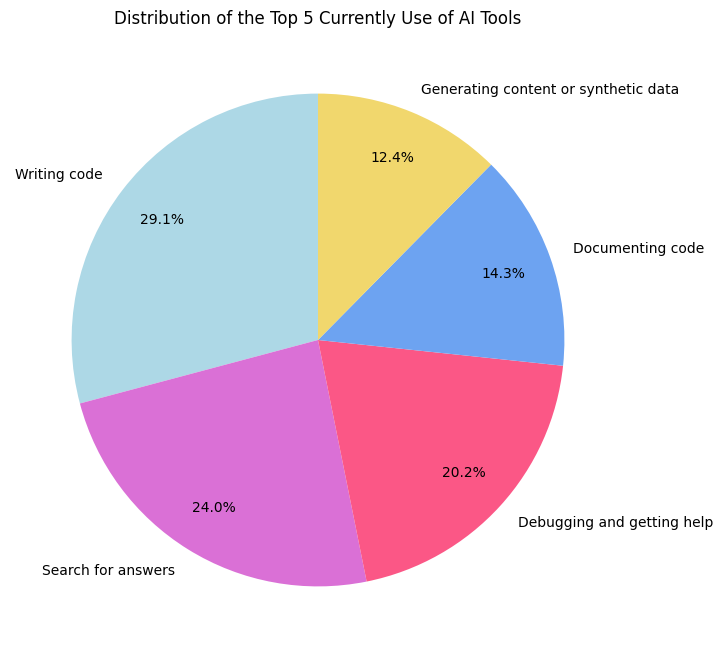

In [48]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_AI, labels=top5_AI.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['lightblue','orchid',
              '#fb5786','#6da3f1','#f1d76d'])

plt.title('Distribution of the Top 5 Currently Use of AI Tools')
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [49]:
#select variable of interest
df_webframe = df[['WebframeWantToWorkWith','ResponseId']] 

In [50]:
#split webframe
df_webframe['WebframeWantToWorkWith']=df_webframe['WebframeWantToWorkWith'].str.split(';')
df_webframe_exploded = df_webframe.explode('WebframeWantToWorkWith') 
df_webframe_exploded['WebframeWantToWorkWith'].unique()

/tmp/ipykernel_8406/4079559344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_webframe['WebframeWantToWorkWith']=df_webframe['WebframeWantToWorkWith'].str.split(';')


array([nan, 'Express', 'Htmx', 'Node.js', 'React', 'Remix',
       'ASP.NET CORE', 'jQuery', 'Next.js', 'Django', 'Ruby on Rails',
       'ASP.NET', 'Blazor', 'Deno', 'Solid.js', 'Angular', 'Laravel',
       'WordPress', 'AngularJS', 'Vue.js', 'Flask', 'CodeIgniter',
       'FastAPI', 'Spring Boot', 'Phoenix', 'Svelte', 'Astro', 'Nuxt.js',
       'Fastify', 'NestJS', 'Symfony', 'Drupal', 'Strapi', 'Elm',
       'Play Framework', 'Gatsby', 'Yii 2'], dtype=object)

In [51]:
#remove NaN
df_webframe_exploded.dropna(subset='WebframeWantToWorkWith',inplace=True)

In [52]:
#check for NaN removal
(df_webframe_exploded.isnull().sum())

WebframeWantToWorkWith    0
ResponseId                0
dtype: int64

In [53]:
#top 5 webframe
webframe_counts = df_webframe_exploded['WebframeWantToWorkWith'].value_counts()
top5_web  = webframe_counts.head(5) 
top5_web

WebframeWantToWorkWith
React           15404
Node.js         14735
Next.js          8507
Vue.js           7604
ASP.NET CORE     6905
Name: count, dtype: int64

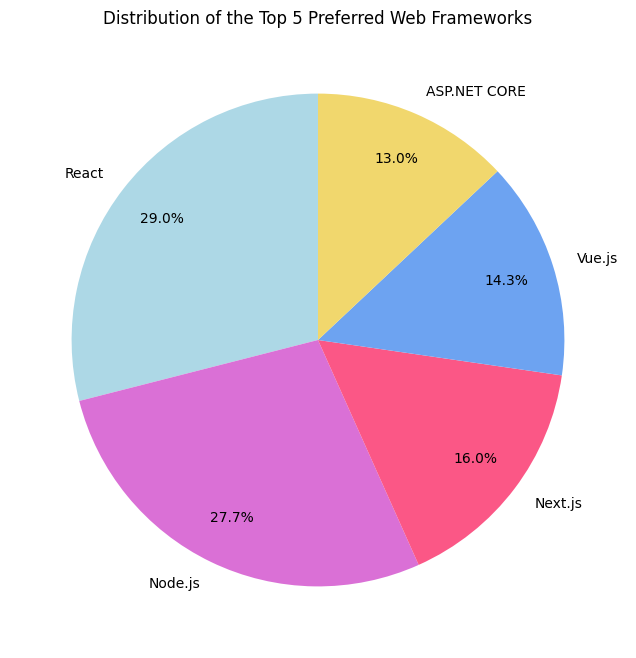

In [54]:
# Plot the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(top5_web, labels=top5_web.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['lightblue','orchid',
              '#fb5786','#6da3f1','#f1d76d'])

plt.title('Distribution of the Top 5 Preferred Web Frameworks')
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [55]:
#select variables
df_emb = df[['EmbeddedWantToWorkWith','ResponseId']] 

In [56]:
#check for unique entry
df_emb['EmbeddedWantToWorkWith'].unique()

array([nan, 'Rasberry Pi', 'CMake;Rasberry Pi', ...,
       "Boost.Test;build2;cppunit;GNU GCC;LLVM's Clang;MSVC;PlatformIO",
       'Boost.Test;cppunit;CUTE;MSVC;Ninja;PlatformIO;ZMK',
       'Catch2;CMake;GNU GCC;PlatformIO'], shape=(1472,), dtype=object)

In [57]:
#split embedded 
df_emb['EmbeddedWantToWorkWith']=df_emb['EmbeddedWantToWorkWith'].str.split(';') 
df_emb_exploded = df_emb.explode('EmbeddedWantToWorkWith') 
df_emb_exploded['EmbeddedWantToWorkWith'].head()

/tmp/ipykernel_8406/2516212443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emb['EmbeddedWantToWorkWith']=df_emb['EmbeddedWantToWorkWith'].str.split(';')


0            NaN
1            NaN
2    Rasberry Pi
3            NaN
4          CMake
Name: EmbeddedWantToWorkWith, dtype: object

In [58]:
#remove NaN 
df_emb_exploded.dropna(subset='EmbeddedWantToWorkWith',inplace=True) 

In [59]:
#check for NaN removal
(df_emb_exploded.isnull().sum())

EmbeddedWantToWorkWith    0
ResponseId                0
dtype: int64

In [60]:
#top 5 embedded
emb_counts = df_emb_exploded['EmbeddedWantToWorkWith'].value_counts() 
top5_emb = emb_counts.head(5) 
top5_emb

EmbeddedWantToWorkWith
Rasberry Pi    9792
Arduino        6482
GNU GCC        5870
CMake          4693
Cargo          4567
Name: count, dtype: int64

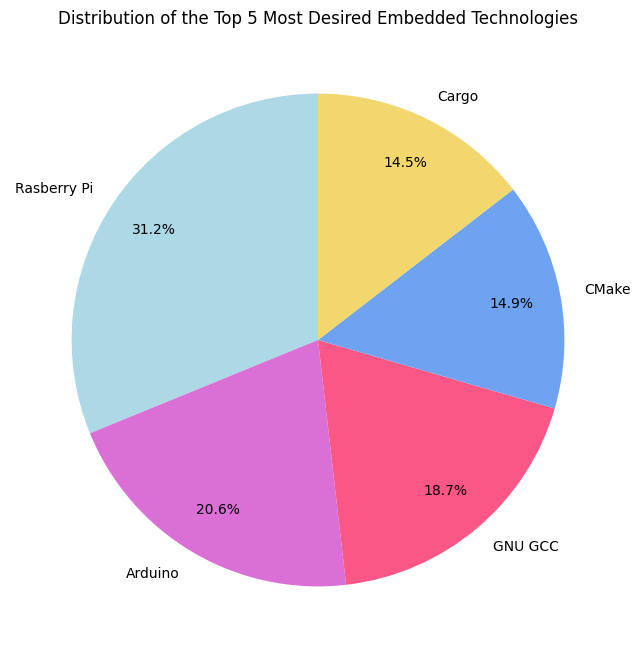

In [61]:
# plot the pie chart
plt.figure(figsize=(8, 8))  
plt.pie(top5_emb, labels=top5_emb.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8,
       colors=['lightblue','orchid',
              '#fb5786','#6da3f1','#f1d76d'])

plt.title('Distribution of the Top 5 Most Desired Embedded Technologies')
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
